In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class neural_network():
    def __init__(self, input_nodes, output_nodes, learning_rate):
        self.inodes = input_nodes
        self.onodes = output_nodes
        self.lr = learning_rate

        self.w = np.random.rand(self.onodes, self.inodes) * 0.01
        self.b = np.zeros((self.onodes, 1))

    def train(self, input, target, cost_array):
        output = np.dot(self.w, input) + self.b

        output_error = (output - target)/input.shape[1]

        d_w = np.dot(output_error, input.T)
        d_b = np.sum(output_error, axis = 1, keepdims = True)

        output_array = output_error.reshape(-1)
        cost = np.sum([x*x for x in output_array])
        cost_array.append(cost)

        self.w -= self.lr * d_w
        self.b -= self.lr * d_b

    def query(self, input):
        output = np.dot(self.w, input) + self.b

        return output


In [3]:
training_df = pd.read_csv("training_data/advertising.csv")

training_data_array = training_df.to_numpy()

array = training_data_array.T

print(array.shape)

(4, 200)


Text(0, 0.5, 'sales')

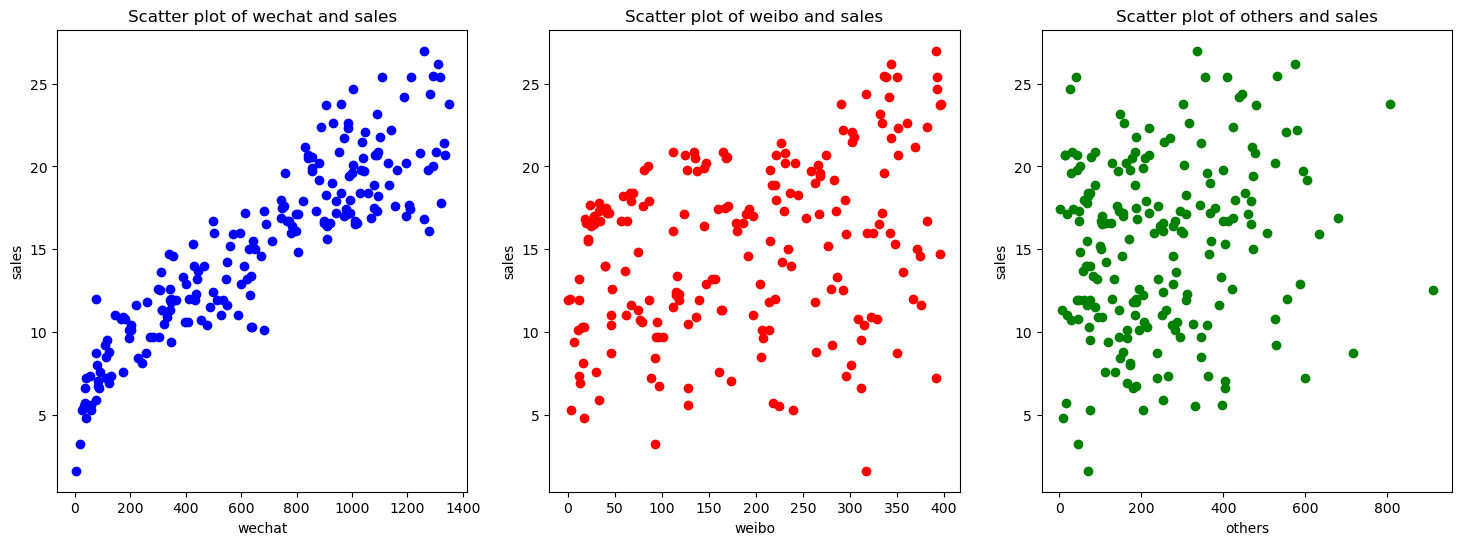

In [4]:
plt.figure(figsize = (18, 6))

plt.subplot(1,3,1)
plt.scatter(training_df['wechat'], training_df['sales'], color = 'blue', marker = 'o')
# plt.plot(array_whchat, pre_array_1, color = 'red')
plt.title("Scatter plot of wechat and sales")
plt.xlabel('wechat')
plt.ylabel('sales')

plt.subplot(1,3,2)
plt.scatter(training_df['weibo'], training_df['sales'], color = 'red')
# plt.plot(array_weibo, pre_array_2, color = 'red')
plt.title("Scatter plot of weibo and sales")
plt.xlabel('weibo')
plt.ylabel('sales')


plt.subplot(1,3,3)
plt.scatter(training_df['others'], training_df['sales'], color = 'green')
# plt.plot(array_others, pre_array_3, color ='red')
plt.title("Scatter plot of others and sales")
plt.xlabel('others')
plt.ylabel('sales')


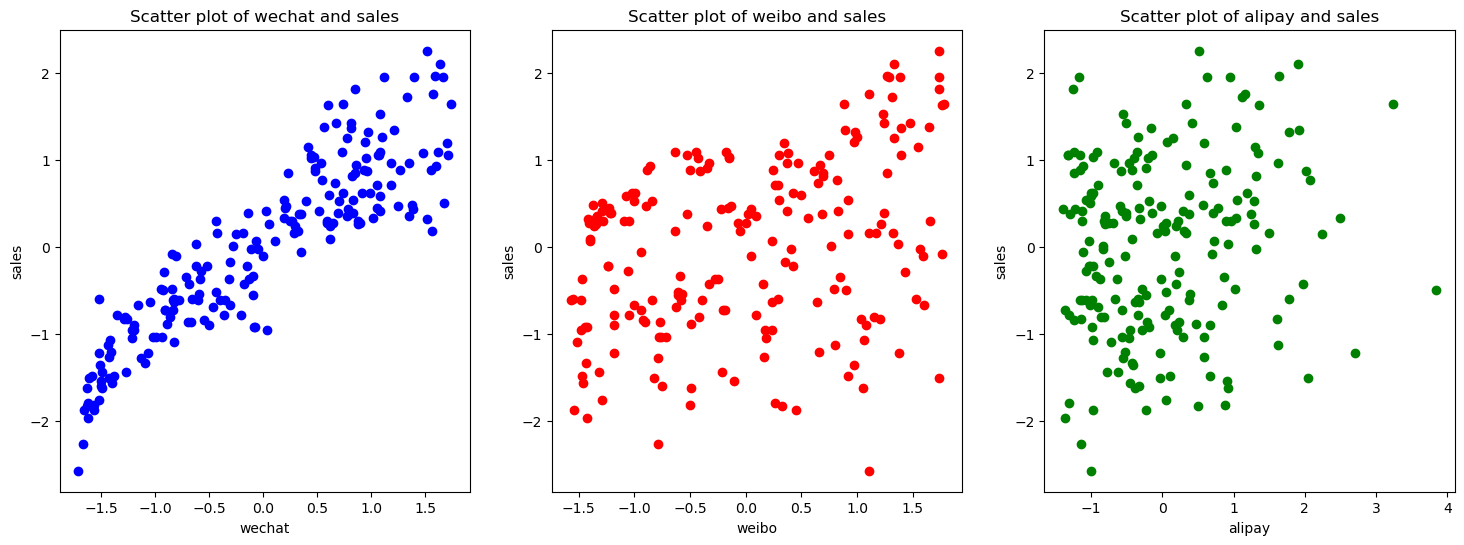

In [5]:
# 标准化
# 标准化是在特征中减去均值并除以标准差，使得数据的分布具有均值为0和标准差为1的特性.
def standardize(array):
    array_mean = array.mean(axis=1, keepdims=True)
    array = array - array_mean
    array_std = array.std(axis=1, keepdims=True)
    array = array / array_std

    return array

def figure(array):
    plt.figure(figsize = (18, 6))

    plt.subplot(1,3,1)
    plt.scatter(array[0,:], array[3,:], color = 'blue')
    plt.title("Scatter plot of wechat and sales")
    plt.xlabel('wechat')
    plt.ylabel('sales')

    plt.subplot(1,3,2)
    plt.scatter(array[1,:], array[3,:], color = 'red')
    plt.title("Scatter plot of weibo and sales")
    plt.xlabel('weibo')
    plt.ylabel('sales')

    plt.subplot(1,3,3)
    plt.scatter(array[2,:], array[3,:], color ='green')
    plt.title("Scatter plot of alipay and sales")
    plt.xlabel('alipay')
    plt.ylabel('sales')  

    plt.show()  

array_1 = standardize(array)
figure(array_1)

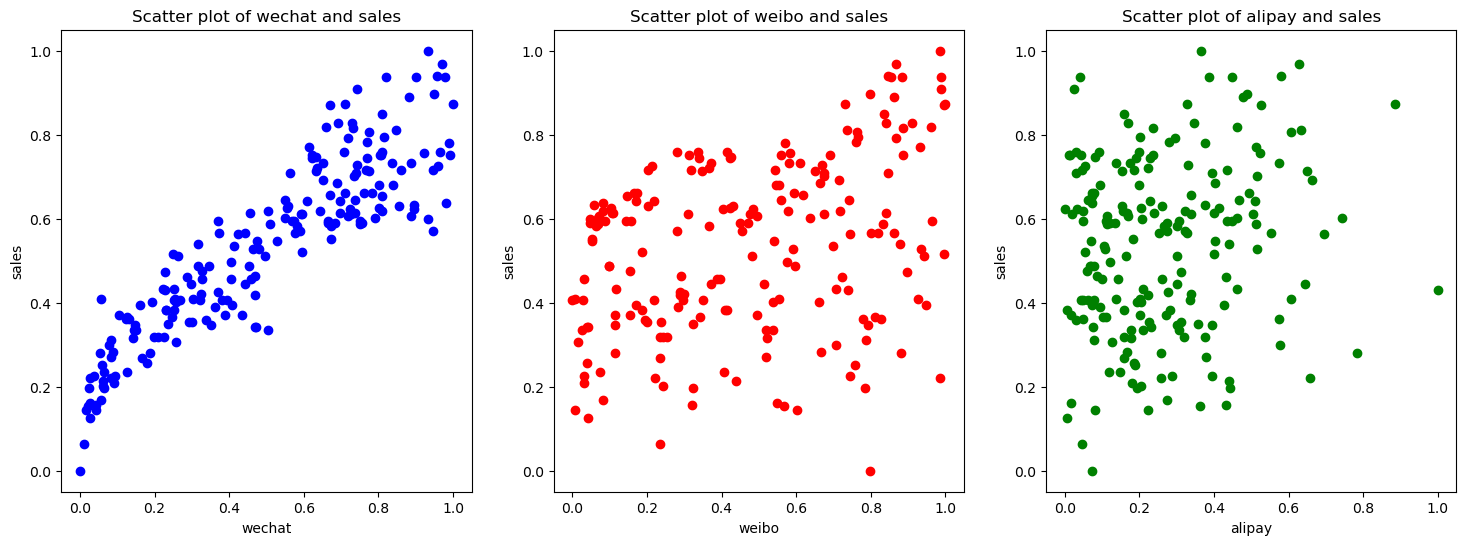

In [6]:
# Min-Max 缩放
# Min-Max缩放将数据缩放到一个特定的范围（通常是0到1）。

def min_max_scaler(array):
    array_max = np.max(array, axis = 1, keepdims = True)
    array_min = np.min(array, axis = 1, keepdims = True)
    array = (array - array_min) / (array_max - array_min)

    return array

array_2 = min_max_scaler(array)
figure(array_2)

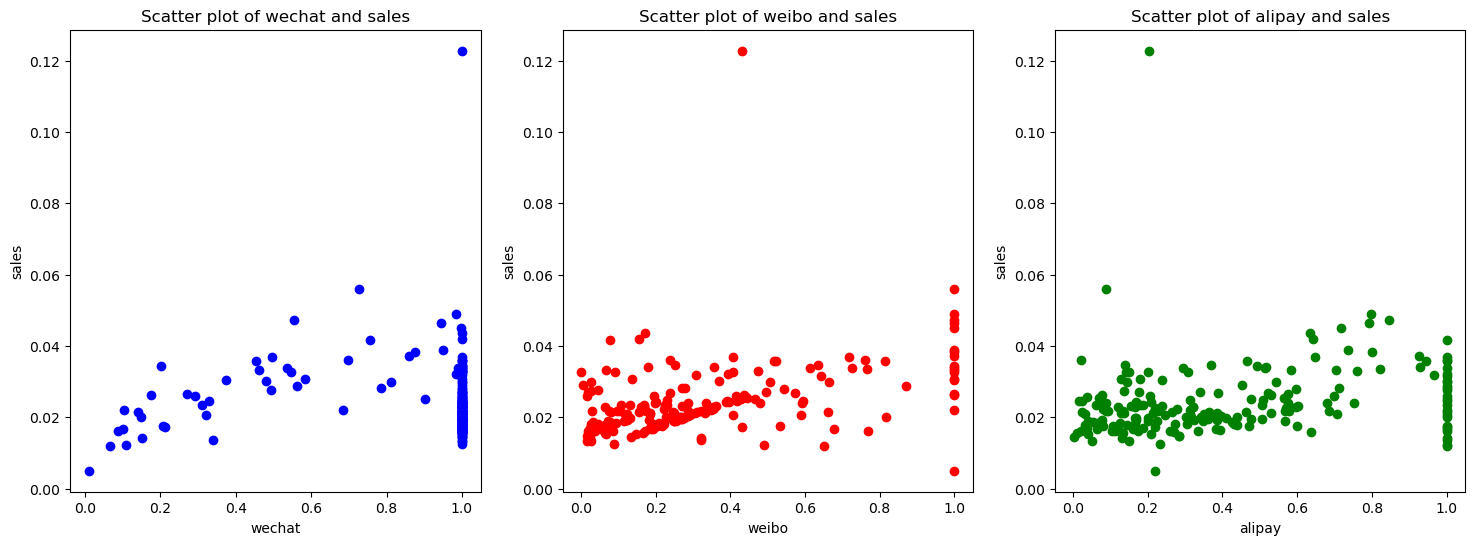

In [7]:
# 最大绝对值缩放
# 这种方法将数据缩放到[-1, 1]的范围，适用于数据集中有正负值且需要保持稀疏性的情况。
def max_abs_scaling(matrix):
    max_abs = np.max(np.abs(matrix), axis=0, keepdims=True)
    scaled_matrix = matrix / max_abs
    return scaled_matrix

array_3 = max_abs_scaling(array)
figure(array_3)

In [8]:
# Robust Scaling
# 如果数据呈正态分布，标准化可能是一个好的选择；如果数据的分布范围不固定或有较多异常值，Robust Scaling可能更合适。

In [9]:
# create example
inputnodes = 3
outputnodes = 1
learningrate = [0.2, 0.1, 0.05, 0.01, 0.005, 0.001]

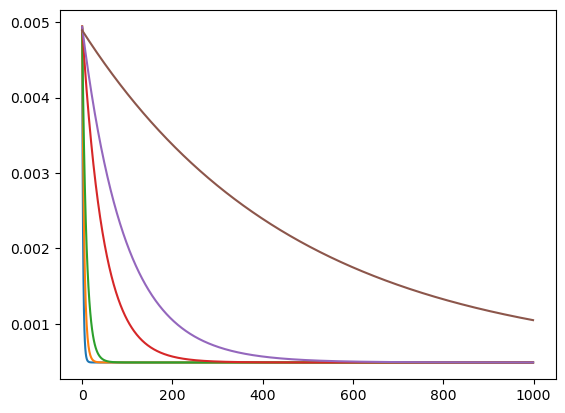

In [10]:
# train the neural network
epochs = 1000

# for i in range(epochs):
#     n.train(standard_array_1, standard_array_2, cost_array)

fig, ax = plt.subplots()
for i in learningrate:
    n = neural_network(inputnodes, outputnodes, i)
    cost_array = []
    for j in range(epochs):
        n.train(array_1[:3,:], array_1[3,:], cost_array)

    ax.plot(cost_array, label = i)
    

In [11]:
print(n.w, n.b)

[[0.56680626 0.19844948 0.05845506]] [[-2.96316791e-17]]
